In [176]:
import os
import numpy as np
import cv2
import math
import seaborn as sns
import matplotlib.pyplot as plt

def ci95(inp):
    max95 = np.mean(inp) + (1.96 * (np.std(inp) / math.sqrt(len(inp))))
    min95 = np.mean(inp) - (1.96 * (np.std(inp) / math.sqrt(len(inp))))
    return min95, max95

def dice_coef_score(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
#     print(intersection)
    return (2. * intersection) / (np.sum(y_true_f) + np.sum(y_pred_f))


In [4]:
cutoff_values=[0.05,0.1,0.15,0.2]

for c, cutoff_value in enumerate(cutoff_values):
    print('-'*20)
    print('cutoff : {}'.format(cutoff_value))
    print('-'*20)
    gt_base = 'D:/lunit/01_data_analysis/data/img/gt_opt/respiratory/'
    base = 'D:/lunit/01_data_analysis/data/img/ai_json(opt)/respiratory/'
    ai_mask_list = os.listdir(base)
    sum_image = len(ai_mask_list)

    fppi_cnt = 0
    fn_cnt = 0
    tp_cnt = 0

    total_cnt=0
    gt_ims= []
    ai_ims = []
    true_detection_rate_li = []
    dscs=[]


    for index, ai_mask in enumerate(sorted(ai_mask_list)):
    #         if index==10:
    #             break
        tp = 0
        fn = 0
        gt_file = '{}_gt.png'.format(ai_mask.split('_cutoff')[0])
        gt_im = cv2.imread(os.path.join(gt_base, gt_file))
        w,h,_=gt_im.shape
        im = cv2.imread(os.path.join(base, ai_mask))
        im = cv2.resize(im, (h,w),interpolation=cv2.INTER_LINEAR)
    #         print(gt_file, ai_mask)
    #         print(gt_im.shape, im.shape)

        imgray = cv2.cvtColor(gt_im,cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)
        gt_contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)
        ai_contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #         print(len(gt_contours), len(ai_contours))
        total_cnt+=len(ai_contours)
    #     print(gt_im.shape, im.shape)
        if gt_im.sum() == 0: # normal
            fppi_cnt += len(ai_contours)

        elif im.sum()==0:
            fn_cnt += len(gt_contours)
            fn+=1

        else:
            for ai_contour in ai_contours:
                _image = np.zeros_like(gt_im)
                _image_ai = cv2.drawContours(_image, [ai_contour], 0, color=1, thickness=-1)

                dsc_li=[]
                for gt_contour in gt_contours:
                    _image = np.zeros_like(gt_im)
                    _image_gt = cv2.drawContours(_image, [gt_contour], 0, color=1, thickness=-1)
                    dsc_li.append(dice_coef_score(_image_gt, _image_ai))

                if max(dsc_li) < cutoff_value:
                    fppi_cnt += 1
                else:
                    tp_cnt+=1
                
                if (c==3 and max(dsc_li)>0):
                    dscs.append(max(dsc_li))

                for gt_contour in gt_contours:
                    _image = np.zeros_like(gt_im)
                    _image_gt = cv2.drawContours(_image, [gt_contour], 0, color=1, thickness=-1)

                    dsc_li=[]
                    for ai_contour in ai_contours:
                        _image = np.zeros_like(gt_im)
                        _image_ai = cv2.drawContours(_image, [ai_contour], 0, color=1, thickness=-1)
                        dsc_li.append(dice_coef_score(_image_ai, _image_gt))

                    if max(dsc_li) < cutoff_value:
                        fn_cnt += 1
    fppi = fppi_cnt/sum_image
    print('='*20)
    print('Calculated FPPI: {:0.2f}'.format(fppi))
    print('Total count: {}'.format(total_cnt))
    print('TP count: {}'.format(tp_cnt))
    print('FP count: {}'.format(fppi_cnt))
    print('FN count: {}'.format(fn_cnt))
    print('Sensitivity: {:0.2f}'.format(tp_cnt/(tp_cnt+fn_cnt)))
    print('='*20)
        #     true_detection_rate = tp_cnt/(tp_cnt+fn_cnt)
        #     min_ci, max_ci = ci95(np.array(true_detection_rate_li))
        #     print('true_detection_rate: {:0.2f} ({:0.2f}, {:0.2f})'.format(true_detection_rate, min_ci, max_ci))


        # Draw the density plot
    #     sns.distplot(ious, hist = False, kde = True,
    #                  kde_kws = {'linewidth': 3},
    #                  )

    #     # Plot formatting
    #     # plt.axis('off')

    #     plt.xlabel('Dice Similarity Coefficient')
    #     plt.ylabel('TP count')
    #     plt.imsave('./test.tif', dpi=300)

--------------------
cutoff : 0.05
--------------------
Calculated FPPI: 0.30
Total count: 237
TP count: 167
FP count: 70
FN count: 59
Sensitivity: 0.74
--------------------
cutoff : 0.1
--------------------
Calculated FPPI: 0.32
Total count: 237
TP count: 164
FP count: 73
FN count: 67
Sensitivity: 0.71
--------------------
cutoff : 0.15
--------------------
Calculated FPPI: 0.32
Total count: 237
TP count: 163
FP count: 74
FN count: 76
Sensitivity: 0.68
--------------------
cutoff : 0.2
--------------------
Calculated FPPI: 0.35
Total count: 237
TP count: 157
FP count: 80
FN count: 91
Sensitivity: 0.63


In [22]:
gt_base = 'D:/lunit/01_data_analysis/data/img/gt_opt/respiratory/'
base = 'D:/lunit/01_data_analysis/data/img/ai_json(opt)/respiratory/'
ai_mask_list = os.listdir(base)
sum_image = len(ai_mask_list)

fppi_cnt = 0
fn_cnt = 0
tp_cnt = 0

total_cnt=0
gt_ims= []
ai_ims = []
true_detection_rate_li = []
dscs=[]


for index, ai_mask in enumerate(sorted(ai_mask_list)):
#         if index==10:
#             break
    tp = 0
    fn = 0
    gt_file = '{}_gt.png'.format(ai_mask.split('_cutoff')[0])
    gt_im = cv2.imread(os.path.join(gt_base, gt_file))
    w,h,_=gt_im.shape
    im = cv2.imread(os.path.join(base, ai_mask))
    im = cv2.resize(im, (h,w),interpolation=cv2.INTER_LINEAR)
#         print(gt_file, ai_mask)
#         print(gt_im.shape, im.shape)

    imgray = cv2.cvtColor(gt_im,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)
    gt_contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)
    ai_contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         print(len(gt_contours), len(ai_contours))
    total_cnt+=len(ai_contours)
#     print(gt_im.shape, im.shape)
    if gt_im.sum() == 0: # normal
        fppi_cnt += len(ai_contours)

    elif im.sum()==0:
        fn_cnt += len(gt_contours)
        fn+=1

    else:
        for ai_contour in ai_contours:
            _image = np.zeros_like(gt_im)
            _image_ai = cv2.drawContours(_image, [ai_contour], 0, color=1, thickness=-1)

            dsc_li=[]
            for gt_contour in gt_contours:
                _image = np.zeros_like(gt_im)
                _image_gt = cv2.drawContours(_image, [gt_contour], 0, color=1, thickness=-1)
                dsc_li.append(dice_coef_score(_image_gt, _image_ai))
            
            if max(dsc_li)>0:
                dscs.append(max(dsc_li))


In [174]:
from scipy.interpolate import BSpline, make_interp_spline

def draw_plot(dscs, name):
    plt.rcParams['font.family']='Times New Roman'
    
    n, bins, patches = plt.hist(dscs, bins=5)
    plt.clf()

    x=[0]
    for i in range(len(bins)-1):
        a=bins[i]
        b=bins[i+1]
        x.append((a+b)/2)
    x.append(1) 

    y=np.append([0], n)
    y=np.append(y, [0])


    x=np.array(x)
    print(x, y)
    xnew = np.linspace(x.min(), x.max(), 200) 

    #define spline
    spl = make_interp_spline(x, y, k=2)
    y_smooth = spl(xnew)
    
#     sns.distplot(dscs, bins=5)
#     plt.tight_layout()
#     plt.show()
    
#     plt.plot(x, y)
#     plt.xlim([0,1])
#     plt.ylim([0,max(n)+20])
#     plt.show()

#     #create smooth line chart 
    plt.plot(xnew, y_smooth, 'k',linewidth=2, label='OPT')
    plt.xlim([0,1])
    plt.ylim([0,70])
    plt.legend(loc='upper left', fontsize=15)
    plt.xlabel('Dice Similarity Coefficient', fontsize=1)
    plt.ylabel('TP count', fontsize=1)
    plt.tight_layout()
    plt.savefig('{}_fig.tif'.format(name), dpi=300)
    plt.show()

[0.         0.09624328 0.28197418 0.46770508 0.65343597 0.83916687
 1.        ] [ 0.  8. 19. 31. 62. 49.  0.]


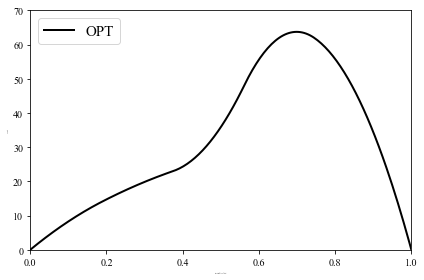

In [175]:
draw_plot(dscs, 'OPT')